In [1]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def imshow(img, title=""):
    # Assume bgr if >= 3 dims
    if len(img.shape) >= 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # Assume gray if not 3 dims
    else:
        plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

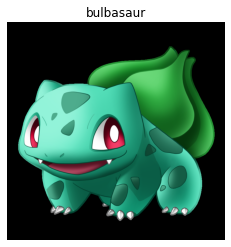

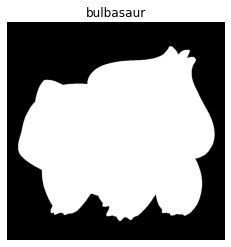

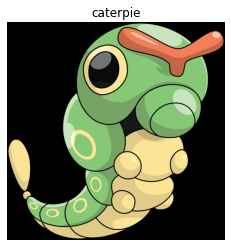

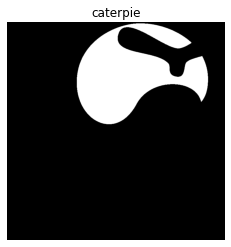

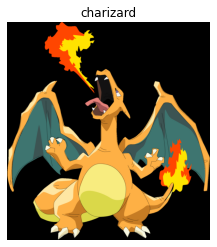

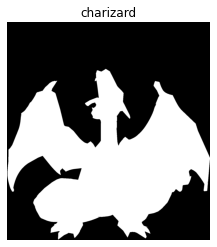

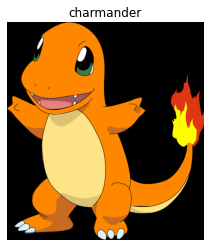

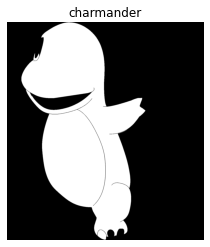

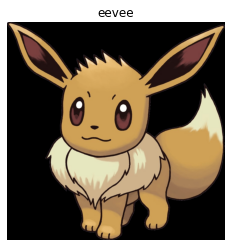

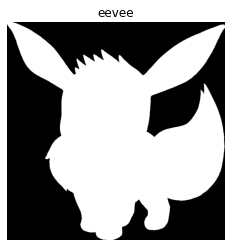

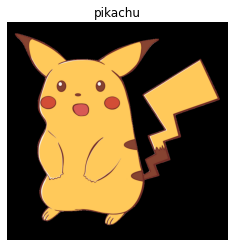

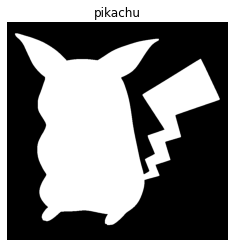

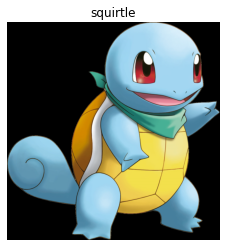

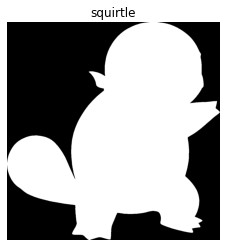

In [34]:
answer_paths = glob.glob("pokemon_images/pokemon/*")

answers = {}
answers_mask = {}

for answer_path in answer_paths:
    basename = os.path.basename(answer_path)
    pokename = os.path.splitext(basename)[0]

    img = cv2.imread(answer_path, cv2.IMREAD_UNCHANGED)
    img[np.where(img[:, :, 3] == 0)] = [0, 0, 0, 0]

    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)

    _, threshed = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    mask = np.zeros(img.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)

    answers[pokename] = img
    answers_mask[pokename] = mask

    imshow(answers[pokename], pokename)
    imshow(answers_mask[pokename], pokename)

In [ ]:
alpha_channel = img[:,:,3]
poke_pixels = np.where(alpha_channel>0)
h,w, = img.shape[:,2]
np.where(alpha_channel==0)
mask = np.zeros((w,h), dtype = "uint8")
mask[poke_pixels]=255
imshow(answers[pokename], pokename)
imshow(answers_mask[pokename], pokename)

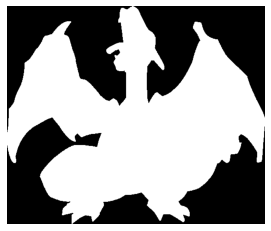

0.5333999120705861
0.687606265512322


In [51]:
sil_paths = glob.glob("pokemon_images/silhouettes/*")
sil_path = sil_paths[2]
sil = cv2.imread(sil_path)
gray = cv2.cvtColor(sil, cv2.COLOR_BGRA2GRAY)

_, threshed = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_contour)
mask = np.zeros(sil.shape[:2], dtype = 'uint8')
cv2.drawContours(mask, [largest_contour], -1,255,-1)
cropped = mask[y:y+h, x:x+w]
imshow(cropped)
box_area = w*h
cnt_area = cv2.contourArea(largest_contour)
bb_solidity = cnt_area/box_area

hull = cv2.convexHull(largest_contour)
hull_area = cv2.contourArea(hull)
solidity = cnt_area/hull_area

print(bb_solidity)
print(solidity)

In [18]:
max(contours, key = cv2.contourArea)

array([[[   0,    0]],

       [[   0,  982]],

       [[   0,  977]],

       [[   1,  976]],

       [[   1,  970]],

       [[   2,  969]],

       [[   2,  964]],

       [[   3,  963]],

       [[   3,  958]],

       [[   4,  957]],

       [[   4,  952]],

       [[   5,  951]],

       [[   5,  946]],

       [[   6,  945]],

       [[   7,  946]],

       [[   7,  952]],

       [[   6,  953]],

       [[   6,  963]],

       [[   5,  964]],

       [[   5,  969]],

       [[   4,  970]],

       [[   4,  975]],

       [[   3,  976]],

       [[   3,  981]],

       [[   2,  982]],

       [[   2,  996]],

       [[   1,  997]],

       [[   1, 1003]],

       [[   2, 1004]],

       [[   2, 1020]],

       [[   3, 1021]],

       [[   3, 1030]],

       [[   4, 1031]],

       [[   4, 1037]],

       [[   5, 1038]],

       [[   5, 1043]],

       [[   6, 1044]],

       [[   6, 1049]],

       [[   7, 1050]],

       [[   7, 1054]],

       [[   8, 1055]],

       [[   8, 1

In [ ]:
#Goal:
#{'pokemon':img...}
#{'bulbasaur':mask...}
